<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 23 декабря 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 23 декабря, -4 балла после 06:00 30 декабря, -6 баллов после 06:00 6 января

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import zscore

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [33]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = -1
    best_model = None
    kernels = ['linear', 'rbf', 'poly']
    
    for kernel in kernels:
        cs = np.logspace(-1, 4, num=6)
        for c in cs:
            if kernel == 'poly':
                for i in xrange(1, 4):
                    #print "kernel ", i, " ", c
                    model = SVC(kernel=kernel, degree=i, C = c)
                    accuracy = np.mean(cross_val_score(model, x, y))
                    if (accuracy > best_accuracy):
                        best_model = model
                        best_accuracy = accuracy
            else:    
                model = SVC(kernel=kernel, C = c)
                accuracy = np.mean(cross_val_score(model, x, y))
                if (accuracy > best_accuracy):
                    best_model = model
                    best_accuracy = accuracy

    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Best model SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.890374
Plotting data set points
Plotting decision region


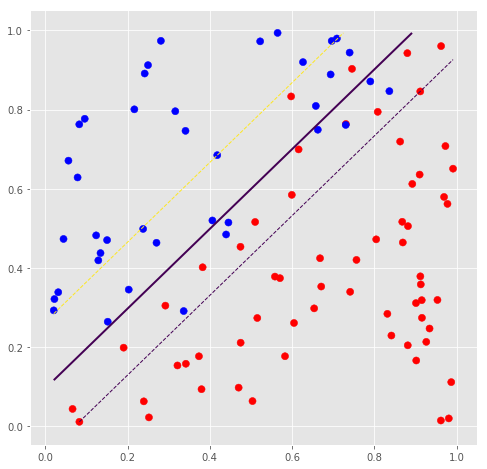

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Best model SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.970588
Plotting data set points
Plotting decision region


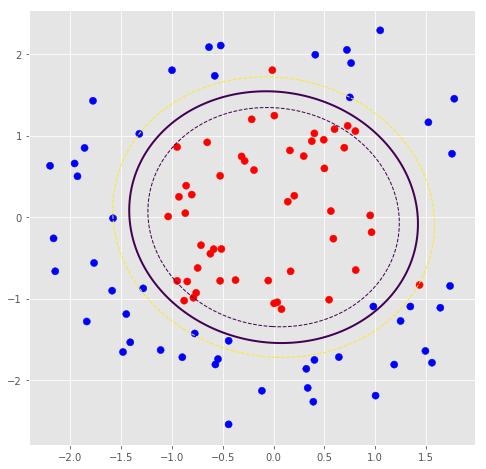

In [5]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
kernel  1   0.1
kernel  2   0.1
kernel  3   0.1
kernel  1   1.0
kernel  2   1.0
kernel  3   1.0
kernel  1   10.0
kernel  2   10.0
kernel  3   10.0
kernel  1   100.0
kernel  2   100.0
kernel  3   100.0
kernel  1   1000.0
kernel  2   1000.0
kernel  3   1000.0
kernel  1   10000.0
kernel  2   10000.0
kernel  3   10000.0
Best model SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.849206
Plotting data set points
Plotting decision region


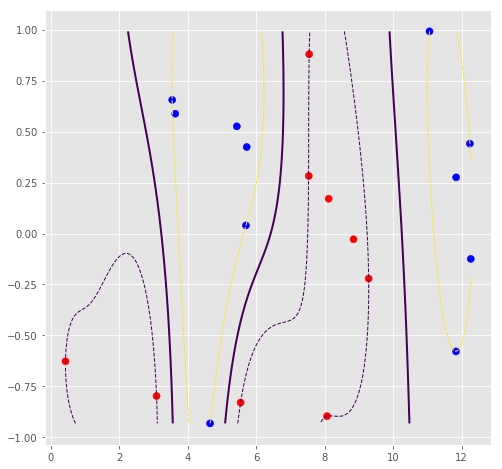

In [14]:
def generate_sin(size=20):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [15]:
df = pd.read_csv("titanium.csv")

In [16]:
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [17]:
X, y = df.x.values, df.y.values
sc = StandardScaler()
vals = sc.fit_transform(X.reshape(-1, 1))

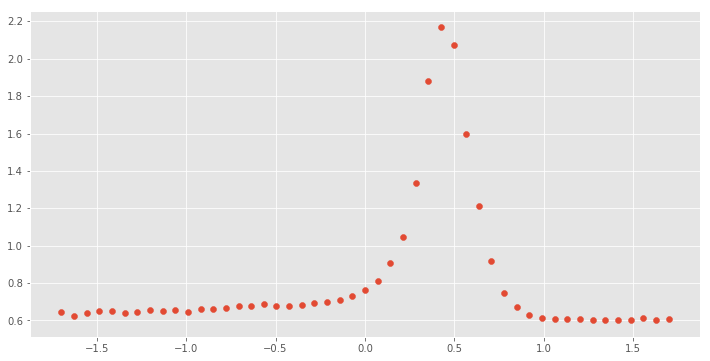

In [18]:
plt.scatter(vals, y, marker='o')

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $С$ каждого из ядер постройте график с данными и предсказанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
gamma = 6
coef0 = 1
degree = 3
eps = 0.01

### Linear kernel

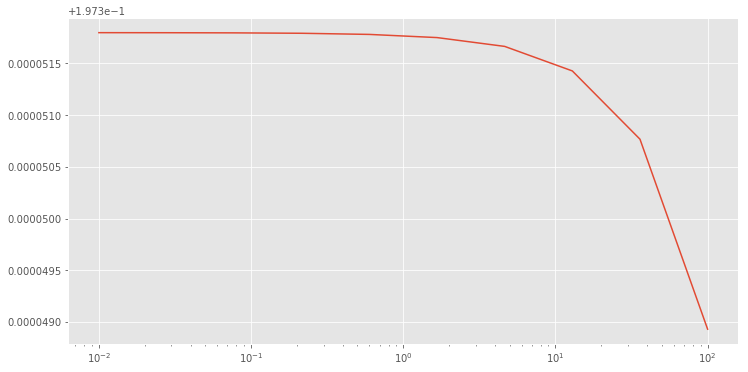

In [21]:
kernel = 'linear'
errors = []
for c in np.logspace(-2, 2, 10):
    model = SVR(C=c, kernel=kernel)
    model.fit(vals, y)
    errors.append([c, mean_absolute_error(y, model.predict(vals))])
    
errors = np.array(errors)
plt.plot(errors[:, 0], errors[:, 1])
plt.xscale('log')

In [22]:
best_c = errors[np.argmin(errors[:, 1], axis=0)][0]

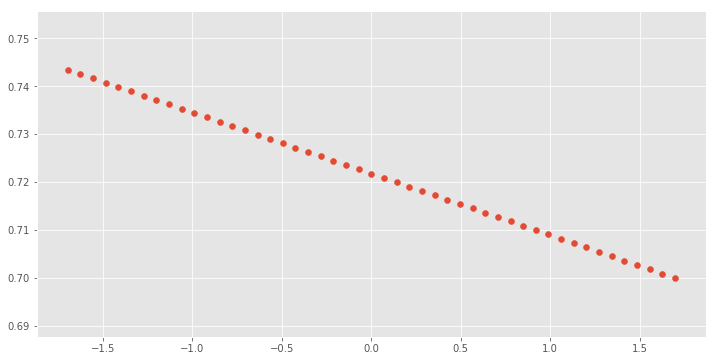

In [23]:
model = SVR(C=best_c, kernel='linear')
model.fit(vals, y)
y_pred = model.predict(vals)
plt.scatter(vals, y_pred, marker='o')

### Polynomial kernel

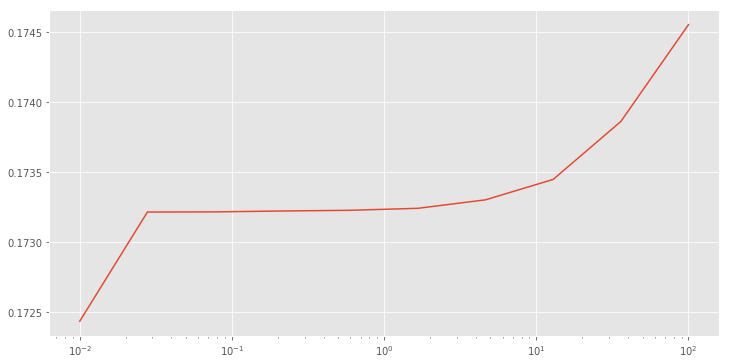

In [24]:
kernel = 'poly'
errors = []
for c in np.logspace(-2, 2, 10):
    model = SVR(kernel=kernel, C=c, degree=degree, gamma=gamma, coef0=coef0)
    model.fit(vals, y)
    errors.append([c, mean_absolute_error(y, model.predict(vals))])
    
errors = np.array(errors)
plt.plot(errors[:, 0], errors[:, 1])
plt.xscale('log')

In [25]:
best_c = errors[np.argmin(errors[:, 1], axis=0)][0]
print best_c

0.01


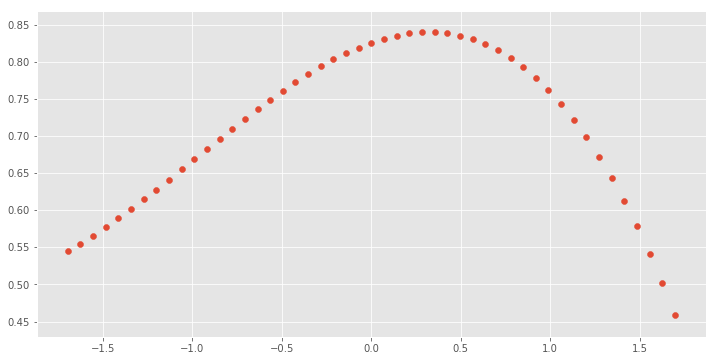

In [26]:
model = SVR(C=best_c, kernel='poly', degree=degree, gamma=gamma, coef0=coef0)
model.fit(vals, y)
y_pred = model.predict(vals)
plt.scatter(vals, y_pred, marker='o')

### RBF kernel

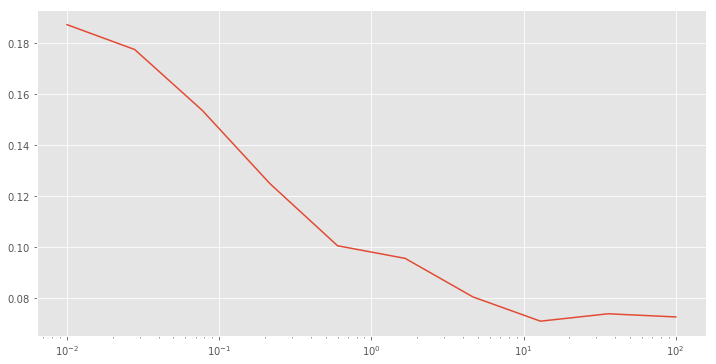

In [27]:
kernel = 'rbf'
errors = []
for c in np.logspace(-2, 2, 10):
    model = SVR(kernel=kernel, C=c, gamma=gamma, coef0=coef0)
    model.fit(vals, y)
    errors.append([c, mean_absolute_error(y, model.predict(vals))])
    
errors = np.array(errors)
plt.plot(errors[:, 0], errors[:, 1])
plt.xscale('log')

In [28]:
print errors

[[  1.00000000e-02   1.87102636e-01]
 [  2.78255940e-02   1.77364172e-01]
 [  7.74263683e-02   1.53487431e-01]
 [  2.15443469e-01   1.24760035e-01]
 [  5.99484250e-01   1.00380574e-01]
 [  1.66810054e+00   9.54322587e-02]
 [  4.64158883e+00   8.03375589e-02]
 [  1.29154967e+01   7.08037032e-02]
 [  3.59381366e+01   7.37048432e-02]
 [  1.00000000e+02   7.24644860e-02]]


In [29]:
best_c = errors[np.argmin(errors[:, 1], axis=0)][0]
print best_c

12.9154966501


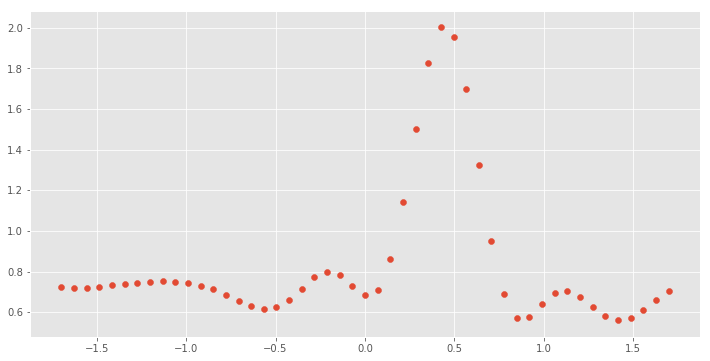

In [30]:
model = SVR(C=best_c, kernel='rbf', gamma=gamma, coef0=coef0)
model.fit(vals, y)
y_pred = model.predict(vals)
plt.scatter(vals, y_pred, marker='o')

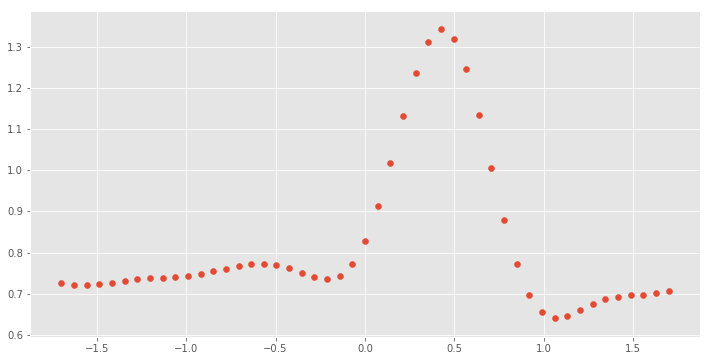

In [31]:
model = SVR(C=0.2, kernel='rbf', gamma=gamma, coef0=coef0)
model.fit(vals, y)
y_pred = model.predict(vals)
plt.scatter(vals, y_pred, marker='o')

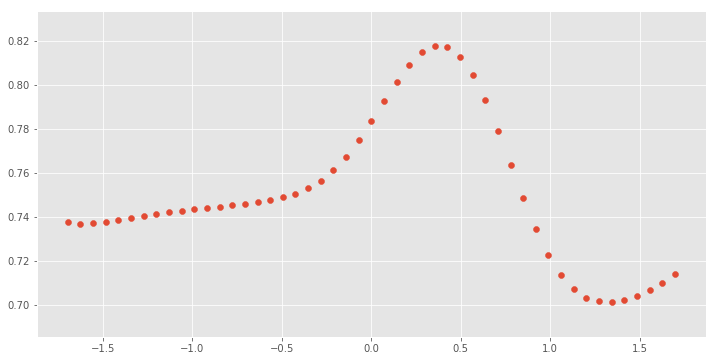

In [32]:
model = SVR(C=0.01, kernel='rbf', gamma=gamma, coef0=coef0)
model.fit(vals, y)
y_pred = model.predict(vals)
plt.scatter(vals, y_pred, marker='o')

На линейном и полиномиальном ядре эфекты недообучения/переобучения не наблюдаются: в данном случае эти модели работают стабильно плохо :)

В случае с rbf ядром график максимально похожий на исходный получается при параметре C около 0.2 далее он начинает сильно искажаться из-за переобучения. А при C = 0.01 мы можем наблюдать эффект недообученности модели.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [4]:
df = pd.read_csv("war_and_peace_es.txt", header=None)
df = df.assign(label=pd.Series([1]*df.shape[0]))
df.columns = ["word", "label"]
df1 = pd.read_csv("war_and_peace_en.txt", header=None)
df1 = df1.assign(label=pd.Series([0]*df.shape[0]))
df1.columns = ["word", "label"]
df = df.append(df1)

In [5]:
# like this
df.head()

,word,label
0,guerra,1
1,pace,1
2,lev,1
3,nicoevic,1
4,tolstj,1


In [6]:
df.tail()

,word,label
5039,leave,0
5040,her,0
5041,task,0
5042,was,0
5043,accomplished,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
RND_SEED = 777555333

In [9]:
dfs = df.sample(n=df.shape[0], random_state=RND_SEED)
dfs = dfs.reset_index()
dfs = dfs[:1000]
dfs.shape

(1000, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dfs.index.values, dfs.label, test_size=0.40, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [11]:
import pylev

In [75]:
def string_kernel(U, V):
    G = np.empty((len(U), len(V)))
    for i in tqdm_notebook(xrange(len(U))):
        for j in xrange(len(V)):
            # для использования при передаче как параметр в SVC
            # dist = pylev.levenshtein(dfs.iloc[int(U[i][0])].word, dfs.iloc[int(V[j][0])].word)
            
            # для предподсчёта
            dist = pylev.levenshtein(dfs.iloc[int(U[i])].word, dfs.iloc[int(V[j])].word)
            G[i, j] = np.exp(-dist)
    return G

In [ ]:
G = string_kernel(X_train, X_train)

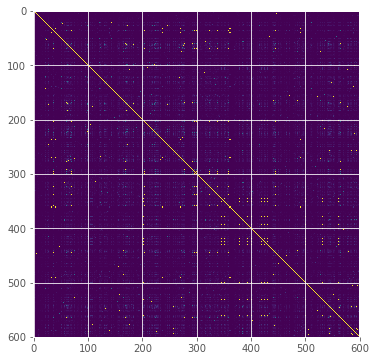

In [35]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [82]:
from sklearn.metrics import accuracy_score

In [ ]:
# так работает слишком долго, поэтому предподсчитаем матрицы
for c in np.logspace(start=-1, stop=4, num=6):
    model = SVC(C=c, kernel=string_kernel, max_iter=1e4)
    model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    yp_train = model.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    yp_test = model.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))
    print "C=%f, train=%f, test=%f" % (c, yp_train, yp_test)

In [77]:
G_test = string_kernel(X_test, X_train)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [78]:
G_train = string_kernel(X_train, X_train)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [80]:
for c in np.logspace(start=-1, stop=4, num=6):
    model = SVC(C=c, kernel="precomputed", max_iter=1e4)
    model.fit(G_train, y_train)
    yp_train = model.score(G_train, y_train)
    yp_test = model.score(G_test, y_test)
    print "C=%f, train=%f, test=%f" % (c, yp_train, yp_test)

C=0.100000, train=0.616667, test=0.617500
C=1.000000, train=0.991667, test=0.812500
C=10.000000, train=0.993333, test=0.817500
C=100.000000, train=0.993333, test=0.817500
C=1000.000000, train=0.993333, test=0.817500
C=10000.000000, train=0.993333, test=0.817500
